In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from random import random
# k-means clustering
from sklearn.cluster import KMeans

In [2]:
points = [(5,2),(5,3), (5,4), (5,5), (10,2), (10,3), (10,4), (10,5)]
c1 = points[0]
c2 = points[3]
result = KMeans(n_clusters=2, init=[c1, c2],max_iter=1).fit(points)
print(f"Cluster center 1: {result.cluster_centers_[0]}, Cluster center 2: {result.cluster_centers_[1]}")
print(f"Cluster 1: {[(f'd{i+1}',points[i]) for i,v in enumerate(result.labels_) if v == 0]}")
print(f"Cluster 2: {[(f'd{i+1}',points[i]) for i,v in enumerate(result.labels_) if v == 1]}")

j:\Workspaces\Conda_Environments\env-ids-ws23\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "j:\Workspaces\Conda_Environments\env-ids-ws23\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
j:\Workspaces\Conda_Environments\env-ids-ws23\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster center 1: [7.5 2.5], Cluster center 2: [7.5 4.5]
Cluster 1: [('d1', (5, 2)), ('d2', (5, 3)), ('d5', (10, 2)), ('d6', (10, 3))]
Cluster 2: [('d3', (5, 4)), ('d4', (5, 5)), ('d7', (10, 4)), ('d8', (10, 5))]


<Axes: >

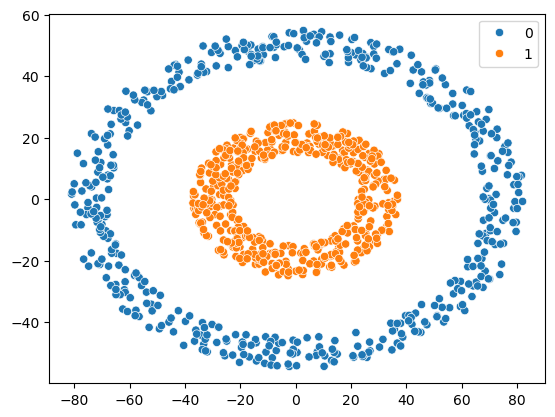

In [3]:
## (b)
# Elipsis function
def elipsis(radius, stretch_x, stretch_y, belt_width):
    # Generates a random point that lies within distance belt_width of the elipsis defined by the parameters
    angle = random() * 2 * np.pi
    factor = random() > 0.5
    factor = -1 if factor else 1
    distance = radius + ((random() * belt_width) * factor)
    x = distance * np.cos(angle)
    y = distance * np.sin(angle)
    return (x * stretch_x, y * stretch_y)

# Generate 1000 points
n_points_el_1 = 500
n_points_el_2 = 500
points = [elipsis(50, 1.5, 1, 5) for i in range(n_points_el_1)] + [elipsis(20, 1.5, 1, 5) for i in range(n_points_el_2)]
target = [0 for i in range(n_points_el_1)] + [1 for i in range(n_points_el_2)]

sns.scatterplot(x=[p[0] for p in points], y=[p[1] for p in points], hue=target)

j:\Workspaces\Conda_Environments\env-ids-ws23\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


<Axes: >

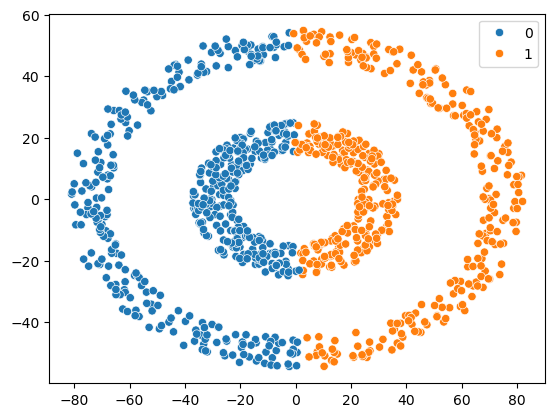

In [4]:
# K-means clustering
result = KMeans(n_clusters=2).fit_predict(points)
sns.scatterplot(x=[p[0] for p in points], y=[p[1] for p in points], hue=result)


<Axes: >

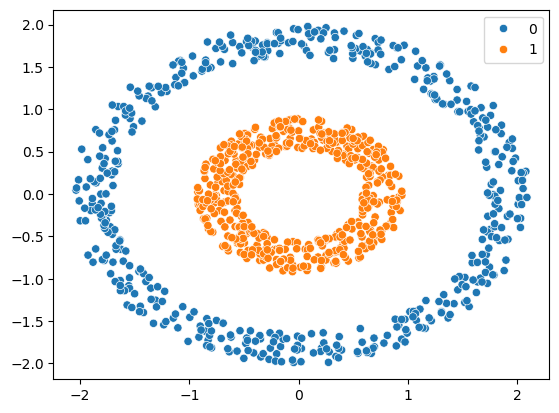

In [5]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dbscan = DBSCAN(eps=0.5, min_samples=5)

scaled = scaler.fit_transform(points)
result = dbscan.fit_predict(scaled)
sns.scatterplot(x=[p[0] for p in scaled], y=[p[1] for p in scaled], hue=result)

<Axes: >

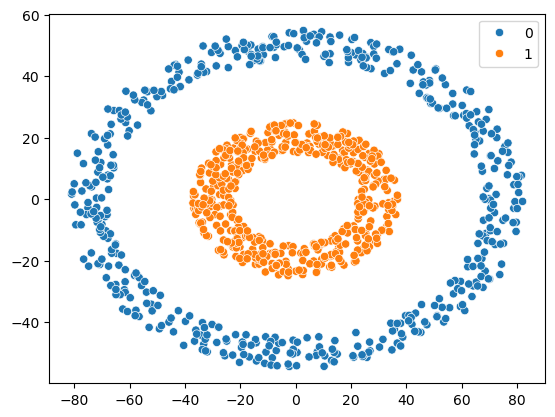

In [6]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
result = agg.fit_predict(points)
sns.scatterplot(x=[p[0] for p in points], y=[p[1] for p in points], hue=result)